## Plot of networks in brain. 2D and 3D

In [22]:
import nilearn
from nilearn import plotting, input_data
from nilearn.input_data import NiftiLabelsMasker
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import nibabel as nib
%run functions-py.py

In [2]:
#X=np.load('../../../Documentos/Mapper/ts_data.npy')

In [3]:
shen_atlas_filename="../Data/Parcellation/shen_2mm_268_parcellation.nii.gz"
sample_file="../Data/Parcellation/func.nii"

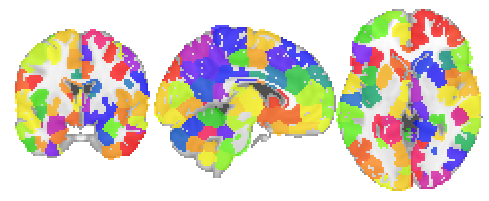

In [4]:
#Full Shen Atlas
plotting.plot_roi(shen_atlas_filename, 
                  annotate = False, 
                  cut_coords = (-5,0,0),
                  cmap = 'prism',
                  draw_cross = False, 
                  #title= 'Shen-268-node parcellation',
                 )
shen_masker = NiftiLabelsMasker(labels_img=shen_atlas_filename);
shen_masker.fit_transform(sample_file);

In [5]:
from nilearn import datasets
from nilearn.surface import vol_to_surf

In [6]:
fsaverage = datasets.fetch_surf_fsaverage()
roi_map=vol_to_surf(shen_atlas_filename,fsaverage['white_left'],interpolation='nearest')

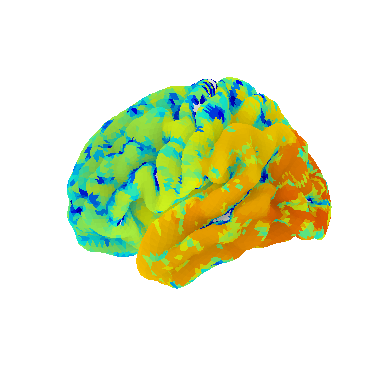

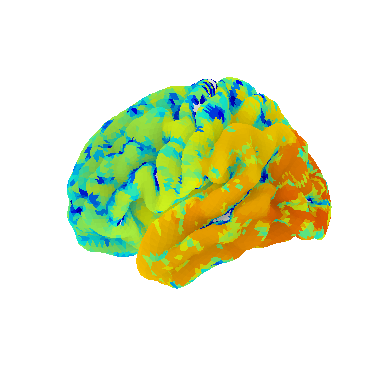

In [7]:
# Shen Atlas (?) The images are generated for depiction purposes
fig = plt.figure(figsize=(5,6));
plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=roi_map,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], 
                       bg_on_data=True,
                       cmap='jet', #rainbow
                       darkness=.5,
                       figure=fig)
#fig.savefig('../Imagenes/thesis/flow/3d_regions_brain2.png', bbox_inches='tight')

### Plotting my regions 

#### Salience

In [8]:
file="../Data/my_rois_net1_ordered.json"

In [9]:
networks=['Salience']
my_dict=regions_from_json(file,networks,verbose=False)
regions=my_dict['array']
lengths=my_dict['length']

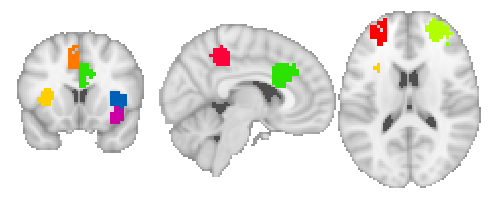

In [10]:
region_vector = np.zeros((1,268))
for i in regions:
    region_vector[0,i] = i/268
region_img = shen_masker.inverse_transform(region_vector);
plotting.plot_stat_map(nilearn.image.index_img(region_img,0), 
                                   threshold = 0.0, 
                                   vmax = 1., 
                                   draw_cross = False,
                                   cmap='prism',
                                   annotate = False,
                                   colorbar=False,
                                   cut_coords = (5,15,15));
plt.show()

#### Default

In [11]:
networks=['Default']
my_dict=regions_from_json(file,networks,verbose=False)
regions=my_dict['array']
lengths=my_dict['length']

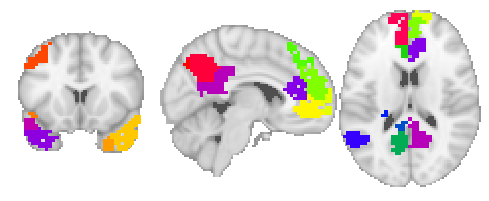

In [12]:
region_vector = np.zeros((1,268))
for i in regions:
    region_vector[0,i] = i/268
region_img = shen_masker.inverse_transform(region_vector);
nilearn.plotting.plot_stat_map(nilearn.image.index_img(region_img,0), 
                                   threshold = 0.0, 
                                   vmax = 1., 
                                   draw_cross = False,
                                   cmap='prism',
                                   annotate = False,
                                   colorbar=False,
                                   cut_coords = (5,15,15));
plt.show()

#### Fronto-Parietal

In [13]:
networks=['Frontal-Parietal']
my_dict=regions_from_json(file,networks,verbose=False)
regions=my_dict['array']
lengths=my_dict['length']

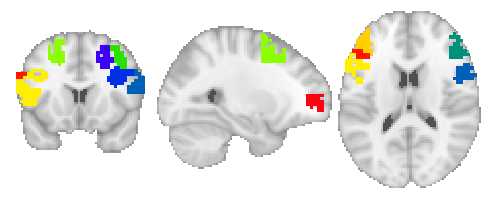

In [14]:
region_vector = np.zeros((1,268))
for i in regions:
    region_vector[0,i] = i/268
region_img = shen_masker.inverse_transform(region_vector);
plotting.plot_stat_map(nilearn.image.index_img(region_img,0), 
                                   threshold = 0.0, 
                                   vmax = 1., 
                                   draw_cross = False,
                                   cmap='prism',
                                   annotate = False,
                                   colorbar=False,
                                   cut_coords = (-25,15,15));
plt.show()

In [15]:
networks=['Salience','Frontal-Parietal','Default']
my_dict=regions_from_json(file,networks,verbose=False)
regions=my_dict['array']
lengths=my_dict['length']
lims=create_limits(lengths)
region_vector = np.zeros((1,268))
for i in regions:
    region_vector[0,i] = i/268
region_img = shen_masker.inverse_transform(region_vector)

In [16]:
fsaverage = datasets.fetch_surf_fsaverage()
roi_map=vol_to_surf(nilearn.image.index_img(region_img,0),fsaverage['white_left'],interpolation='nearest')

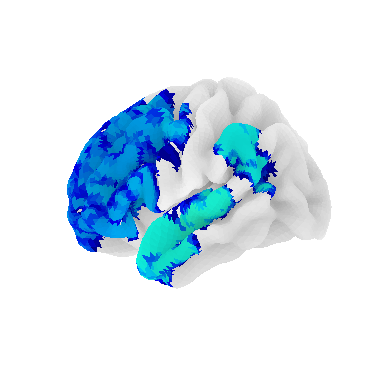

In [17]:
# Regions of netwroks in Shen Atlas (?) The images are generated for depiction purposes
fig = plt.figure(figsize=(5,6));
plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=roi_map,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], 
                       bg_on_data=True,
                       cmap='jet', #rainbow
                       darkness=.5,
                       figure=fig)
fig.savefig('../Imagenes/thesis/flow/3d_regions_partial.png', bbox_inches='tight')

In [18]:
# fig = plt.figure(figsize=(5,6));
# ax1 = fig.add_subplot(111)

#
# plotting.plot_roi(nilearn.image.index_img(region_img,0),
#                         threshold = 0.0, 
#                         vmax = 1., 
#                         display_mode='z', 
#                         cut_coords=[30],
#                         draw_cross = False,
#                         cmap='prism',
#                         annotate = False,
#                         axes=ax1)
# fig.savefig('../Imagenes/avance_3/brain_slices/regions_50.png', bbox_inches='tight')

# fig = plt.figure(figsize=(5,6));
# ax1 = fig.add_subplot(111)
# region_vector = np.zeros((1,268))
# for i in regions:
#     region_vector[0,i] = i/268
# region_img = shen_masker.inverse_transform(region_vector);
# plotting.plot_roi(nilearn.image.index_img(region_img,0),
#                         threshold = 0.0, 
#                         vmax = 1., 
#                         display_mode='z', 
#                         cut_coords=[10],
#                         draw_cross = False,
#                         cmap='prism',
#                         annotate = False,
#                         axes=ax1)
# fig.savefig('../Imagenes/avance_3/brain_slices/regions_30.png', bbox_inches='tight')

# fig = plt.figure(figsize=(5,6));
# ax1 = fig.add_subplot(111)
# region_vector = np.zeros((1,268))
# for i in regions:
#     region_vector[0,i] = i/268
# region_img = shen_masker.inverse_transform(region_vector);
# plotting.plot_roi(nilearn.image.index_img(region_img,0),
#                         threshold = 0.0, 
#                         vmax = 1., 
#                         display_mode='z', 
#                         cut_coords=[-10],
#                         draw_cross = False,
#                         cmap='prism',
#                         annotate = False,
#                         axes=ax1)
# fig.savefig('../Imagenes/avance_3/brain_slices/regions_10.png', bbox_inches='tight')

In [23]:
#Define legend for next plot
cmap = cm.get_cmap('brg')
def f(x):
    return((x-0.33)/0.67)
p1= mpatches.Patch(color=cmap(f(0.33)), label='Salience')
p2= mpatches.Patch(color=cmap(f(0.33*2)), label='Fronto-Parietal')
p3= mpatches.Patch(color=cmap(f(0.33*3)), label='Default')
handles=[p1,p2,p3]

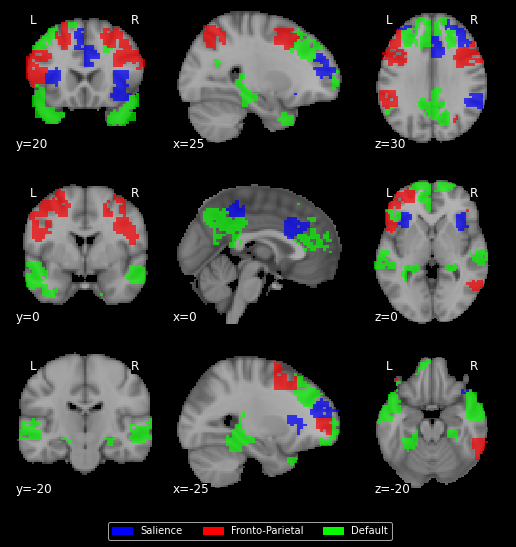

In [24]:
#Views of regions of Salience, Fronto-Parietal and Default networks
plt.style.use('dark_background')
f = plt.figure(figsize=(9,9));
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)
region_vector = np.zeros((1,268))
j=1
for i in range(len(regions)):
    if (i<lims[j]):
        region_vector[0,regions[i]] = 0.33*(j)
    if (i > lims[j]):
        j=j+1
    if (j>3):
        break
region_img = shen_masker.inverse_transform(region_vector);
plotting.plot_roi(nilearn.image.index_img(region_img,0), 
                   threshold = 0.0, 
                   vmax = 1., 
                   draw_cross = False,
                   annotate = True,
                   cmap='brg',
                   colorbar=False,
                   cut_coords = (25,20,30),
                   black_bg =True,
                   axes = ax1);
plotting.plot_roi(nilearn.image.index_img(region_img,0), 
                   threshold = 0.0, 
                   vmax = 1., 
                   draw_cross = False,
                   annotate = True,
                   cmap='brg',
                   colorbar=False,
                   cut_coords = (0,0,0),
                   black_bg =True,
                   axes = ax2);
plotting.plot_roi(nilearn.image.index_img(region_img,0), 
                   threshold = 0.0, 
                   vmax = 1., 
                   draw_cross = False,
                   annotate = True,
                   cmap='brg',
                   colorbar=False,
                   cut_coords = (-25,-20,-20),
                   black_bg =True,
                   axes = ax3);
f.legend(handles=handles,bbox_to_anchor=(0.5, 0.05),loc='lower center',ncol=3)
plt.show()
f.savefig('../Imagenes/avance_3/regions_on_brain.png', bbox_inches='tight')

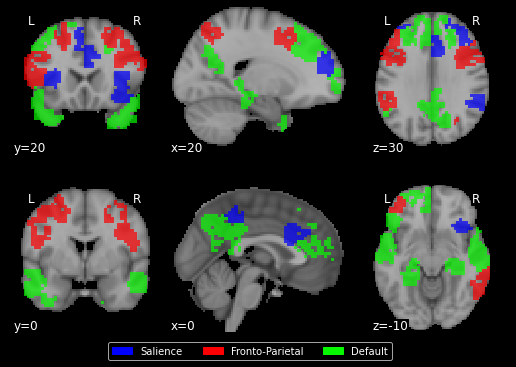

In [25]:
#Views of regions of Salience, Fronto-Parietal and Default networks
plt.style.use('dark_background')
f = plt.figure(figsize=(9,6));
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)
region_vector = np.zeros((1,268))
j=1
for i in range(len(regions)):
    if (i<lims[j]):
        region_vector[0,regions[i]] = 0.33*(j)
    if (i > lims[j]):
        j=j+1
    if (j>3):
        break
region_img = shen_masker.inverse_transform(region_vector);
plotting.plot_roi(nilearn.image.index_img(region_img,0), 
                   threshold = 0.0, 
                   vmax = 1., 
                   draw_cross = False,
                   annotate = True,
                   cmap='brg',
                   colorbar=False,
                   cut_coords = (20,20,30),
                   black_bg =True,
                   axes = ax1);
plotting.plot_roi(nilearn.image.index_img(region_img,0), 
                   threshold = 0.0, 
                   vmax = 1., 
                   draw_cross = False,
                   annotate = True,
                   cmap='brg',
                   colorbar=False,
                   cut_coords = (0,0,-10),
                   black_bg =True,
                   axes = ax2);
f.legend(handles=handles,bbox_to_anchor=(0.5, 0.05),loc='lower center',ncol=3)
plt.show()
f.savefig('../Imagenes/avance_3/regions_on_brain_2.png', bbox_inches='tight')